<a href="https://colab.research.google.com/github/tntnu/default/blob/main/%5B%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%EC%97%B0%EC%8A%B5%5D_%EC%B1%84%EB%AC%B4%EB%B6%88%EC%9D%B4%ED%96%89%EC%97%AC%EB%B6%80%EC%98%88%EC%B8%A1_2%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
from google.colab import files
uploaded_file = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded_file = files.upload()

Saving test.csv to test.csv


***🔥 추천하는 Feature Engineering 순서***  
1️⃣ 결측치 처리 → NaN 값 대체 (fillna() 활용)  
2️⃣ 이상치 탐색 및 처리 → IQR 또는 Winsorizing 활용  
3️⃣ 로그 변환(필요 시) → 이상치를 처리한 후 적용  
4️⃣ 범주형 변수 변환 → One-Hot Encoding 또는 Label Encoding  
5️⃣ 변수 제거 (Feature Selection) → 다중공선성 제거, 중요 변수만 유지



# ***1. Exploratory data analysis***

## ***1.1 데이터 탐색***

In [164]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [68]:
train.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,자가,1941337.5,10년 이상,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,월세,1979505.0,10년 이상,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,월세,1356381.0,4년,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,월세,1049017.5,6년,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,월세,4320217.5,2년,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [69]:
train.columns

Index(['UID', '주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [70]:
train.shape

(10000, 18)

In [71]:
test.shape

(2062, 17)

In [72]:
train.isnull().sum()
# 결측치가 없는 아주 깔끔한 데이터

,0
UID,0
주거 형태,0
연간 소득,0
현재 직장 근속 연수,0
체납 세금 압류 횟수,0
개설된 신용계좌 수,0
신용 거래 연수,0
최대 신용한도,0
신용 문제 발생 횟수,0
마지막 연체 이후 경과 개월 수,0


In [73]:
test.isnull().sum()

,0
UID,0
주거 형태,0
연간 소득,0
현재 직장 근속 연수,0
체납 세금 압류 횟수,0
개설된 신용계좌 수,0
신용 거래 연수,0
최대 신용한도,0
신용 문제 발생 횟수,0
마지막 연체 이후 경과 개월 수,0


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

## ***1.2 데이터 시각화***

* Bar chart for categorical features

1. 주거 형태
2. 현재 직장 근속 연수
3. 대출 목적
4. 대출 상환 기간
5. 체납 세금 압류 횟수





📌 어떤 변수가 종속 변수에 영향을 미치는지 확인하려면 "그룹 내 비율"을 봐야 함

In [75]:
train[train['채무 불이행 여부'] == 0]['주거 형태']

,주거 형태
0,자가
1,월세
4,월세
7,주택 담보 대출 (거주 중)
9,자가
...,...
9995,주택 담보 대출 (거주 중)
9996,주택 담보 대출 (거주 중)
9997,주택 담보 대출 (거주 중)
9998,자가


In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [77]:
def bar_chart(feature) :
  default = train[train['채무 불이행 여부'] == 1][feature].value_counts()
  non_default = train[train['채무 불이행 여부'] == 0][feature].value_counts()
  df = pd.DataFrame([default, non_default])
  df.index = ['default', 'non_default']
  df.plot(kind = 'bar', stacked = True, figsize = (10, 5)) # stacked=True → 누적 막대 그래프

In [78]:
train['주거 형태'].value_counts()

,count
주거 형태,
월세,4050
주택 담보 대출 (거주 중),3633
자가,2241
주택 담보 대출 (비거주 중),76


In [79]:
default = train[train['채무 불이행 여부'] == 1]['주거 형태'].value_counts()
default

,count
주거 형태,
월세,1559
주택 담보 대출 (거주 중),1107
자가,734
주택 담보 대출 (비거주 중),12


In [80]:
non_default = train[train['채무 불이행 여부'] == 0]['주거 형태'].value_counts()
non_default

,count
주거 형태,
주택 담보 대출 (거주 중),2526
월세,2491
자가,1507
주택 담보 대출 (비거주 중),64


In [81]:
df = pd.DataFrame([default, non_default])
df

주거 형태,월세,주택 담보 대출 (거주 중),자가,주택 담보 대출 (비거주 중)
count,1559,1107,734,12
count,2491,2526,1507,64


### ***1.2.1 주거형태***

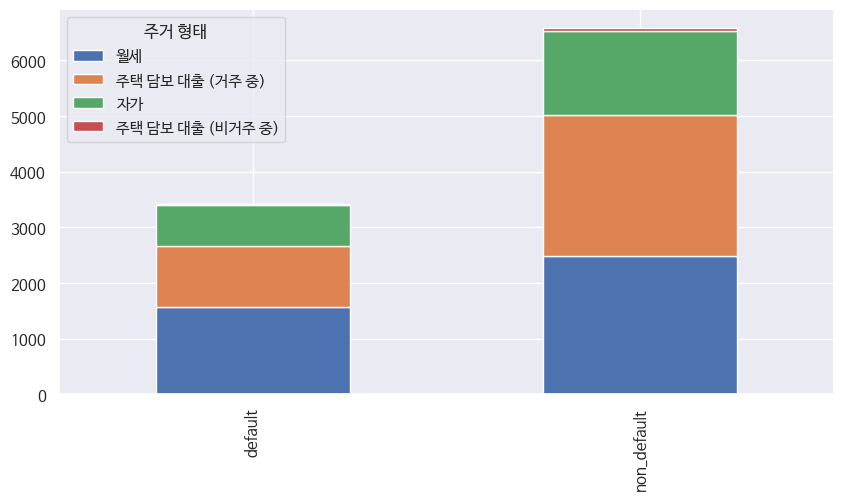

In [82]:
bar_chart('주거 형태')

In [83]:
train.groupby('채무 불이행 여부')['주거 형태'].value_counts(normalize = True).unstack() *100 # unstack() 데이터 구조 차이

# 월세 거주자는 채무 불이행 비율이 더 높음 (+7.88%)
# → 월세 거주자는 대출 상환 능력이 상대적으로 낮을 가능성이 있음 (소득이 불안정할 가능성)
# -> 자가 비율은 비슷하므로 채무 불이행에 미치는 영향이 크지 않음
# -> 주택 담보 대출(거주 중)의 경우 불이행 비율이 낮으므로 경제적으로 더 안정적인 경우가 많을 가능성 있음
# -> 주택 담보 대출(비거주 중)의 경우 불이행 비율이 낮으므로 경제적으로 더 안정적인 경우가 많을 가능성 있음
# 📌 월세만 유독 불이행 비율이 높아서 "주거 형태"가 불이행을 예측하는 데 영향을 줄 수도 있음(실제로는 아닐수도 있음, 관계를 탐색하는데 유용)

주거 형태,월세,자가,주택 담보 대출 (거주 중),주택 담보 대출 (비거주 중)
채무 불이행 여부,,,,
0,37.811172,22.874924,38.342441,0.971463
1,45.691676,21.512309,32.444314,0.351700


In [84]:
train.groupby('채무 불이행 여부')['주거 형태'].value_counts(normalize = True) * 100

채무 불이행 여부  주거 형태           
0          주택 담보 대출 (거주 중)     38.342441
           월세                  37.811172
           자가                  22.874924
           주택 담보 대출 (비거주 중)     0.971463
1          월세                  45.691676
           주택 담보 대출 (거주 중)     32.444314
           자가                  21.512309
           주택 담보 대출 (비거주 중)     0.351700
Name: proportion, dtype: float64

### ***1.2.2 현재 직장 근속 연수***


In [85]:
train['현재 직장 근속 연수'].value_counts().sort_index()

,count
현재 직장 근속 연수,
10년 이상,3828
1년,581
1년 미만,488
2년,1225
3년,523
4년,541
5년,729
6년,357
7년,619


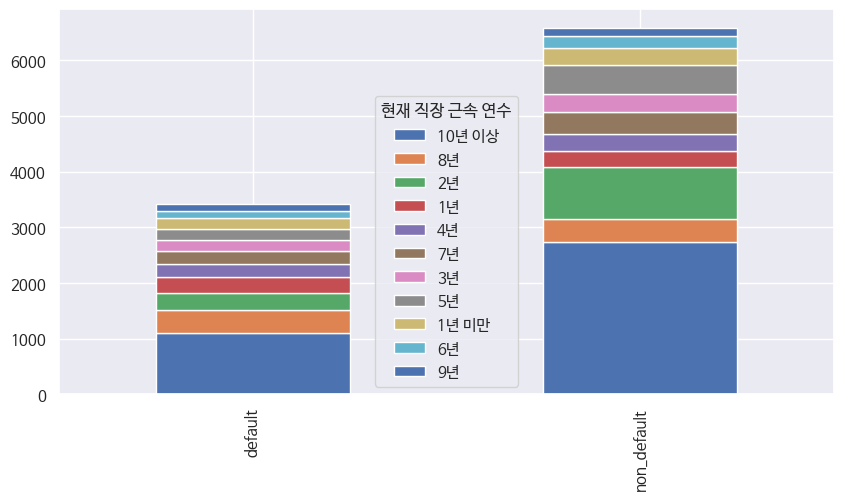

In [86]:
bar_chart('현재 직장 근속 연수')

In [87]:
train.groupby('채무 불이행 여부')['현재 직장 근속 연수'].value_counts(normalize = True).unstack() * 100

현재 직장 근속 연수,10년 이상,1년,1년 미만,2년,3년,4년,5년,6년,7년,8년,9년
채무 불이행 여부,,,,,,,,,,,
0,41.438980,4.523376,4.584092,13.995143,4.781421,4.584092,8.029751,3.309047,5.950213,6.466302,2.337583
1,32.180539,8.294256,5.451348,8.880422,6.096131,7.004689,5.861665,4.073857,6.652989,12.162954,3.341149


### ***1.2.3 대출 목적***

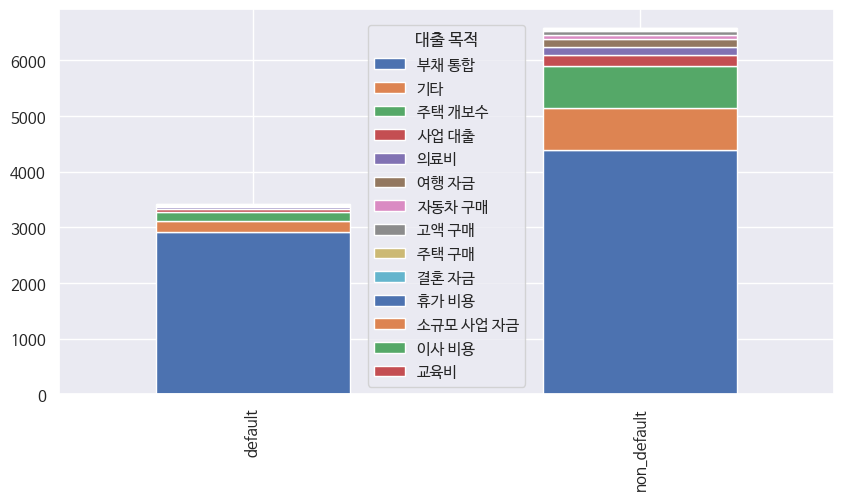

In [88]:
bar_chart('대출 목적')

In [89]:
train.groupby('채무 불이행 여부')['대출 목적'].value_counts(normalize = True).unstack() * 100

# 부채 통합의 경우 불이행 비율이 매우 높음

대출 목적,결혼 자금,고액 구매,교육비,기타,부채 통합,사업 대출,소규모 사업 자금,여행 자금,의료비,이사 비용,자동차 구매,주택 개보수,주택 구매,휴가 비용
채무 불이행 여부,,,,,,,,,,,,,,
0,0.182149,0.910747,0.045537,11.520947,66.590771,3.142077,0.394657,2.200971,1.927747,0.060716,1.244687,11.384335,0.333940,0.060716
1,0.058617,0.234467,NaN,6.184056,85.199297,1.377491,NaN,0.820633,0.908558,NaN,0.381008,4.660023,0.117233,0.058617


In [90]:
train['대출 목적'].value_counts()

,count
대출 목적,
부채 통합,7294
기타,970
주택 개보수,909
사업 대출,254
여행 자금,173
의료비,158
자동차 구매,95
고액 구매,68
소규모 사업 자금,26


### ***1.2.4 대출 상환 기간***

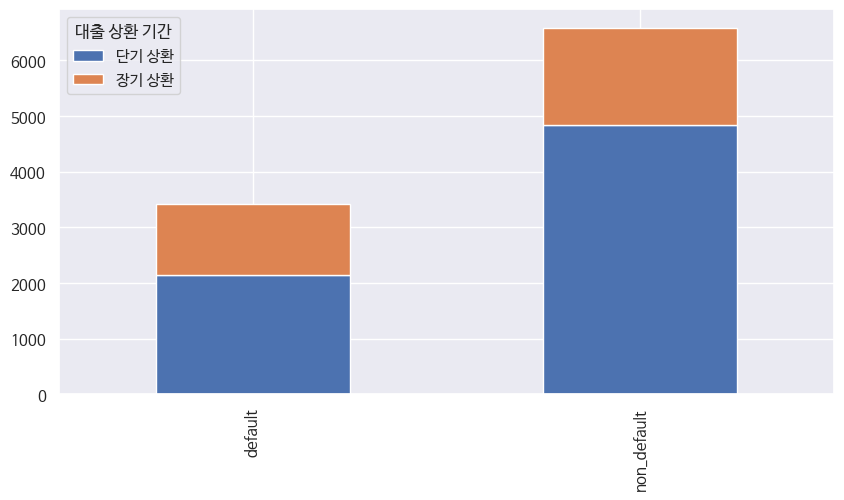

In [91]:
bar_chart('대출 상환 기간')

In [92]:
train.groupby('채무 불이행 여부')['대출 상환 기간'].value_counts(normalize = True).unstack() * 100
# 장기 상환의 경우 채무 불이행할 가능성 있음

대출 상환 기간,단기 상환,장기 상환
채무 불이행 여부,,
0,73.497268,26.502732
1,62.514654,37.485346


### ***1.2.5 연간 소득***

📌 ***하나의 그래프에서 여러 데이터를 비교 ➝ kdeplot()***  
📌 ***실제 데이터 개수와 분포를 비교 -> histplot()***  
📌 ***데이터가 밀집한 곳일수록 KDE 값이 높아짐***

In [93]:
default = train[train['채무 불이행 여부'] == 1]
non_default = train[train['채무 불이행 여부'] == 0]

In [94]:
train['채무 불이행 여부'].value_counts()

,count
채무 불이행 여부,
0,6588
1,3412


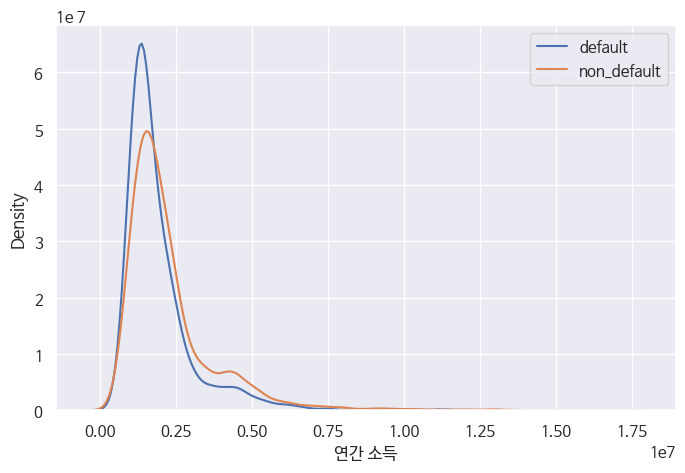

In [95]:
plt.figure(figsize=(8, 5))
sns.kdeplot(default['연간 소득'], label='default')
sns.kdeplot(non_default['연간 소득'], label='non_default')
plt.legend()

# 낮은 연간 소득인 경우 채무 불이행 밀도가 높으므로 상대적으로 채무 불이행일 경우가 높음

### ***1.2.6 체납 세금 압류 횟수***

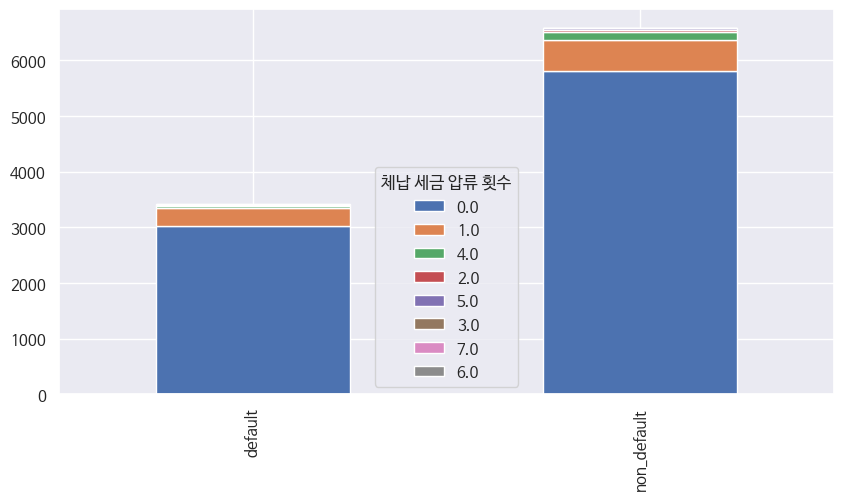

In [96]:
bar_chart("체납 세금 압류 횟수")

In [97]:
train.groupby('채무 불이행 여부')['체납 세금 압류 횟수'].value_counts(normalize = True).unstack() * 100
# 체납 세급 압류 횟수가 1, 2회인 경우 상대적으로 불이행일 경우 높음

체납 세금 압류 횟수,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0
채무 불이행 여부,,,,,,,,
0,88.084396,8.636916,0.561627,0.045537,2.109897,0.364299,0.045537,0.151791
1,88.599062,9.232122,0.674091,0.029308,1.084408,0.381008,NaN,NaN


In [98]:
train['체납 세금 압류 횟수'].value_counts().sort_index()

,count
체납 세금 압류 횟수,
0.0,8826
1.0,884
2.0,60
3.0,4
4.0,176
5.0,37
6.0,3
7.0,10


### ***1.2.7 개설된 신용계좌 수***

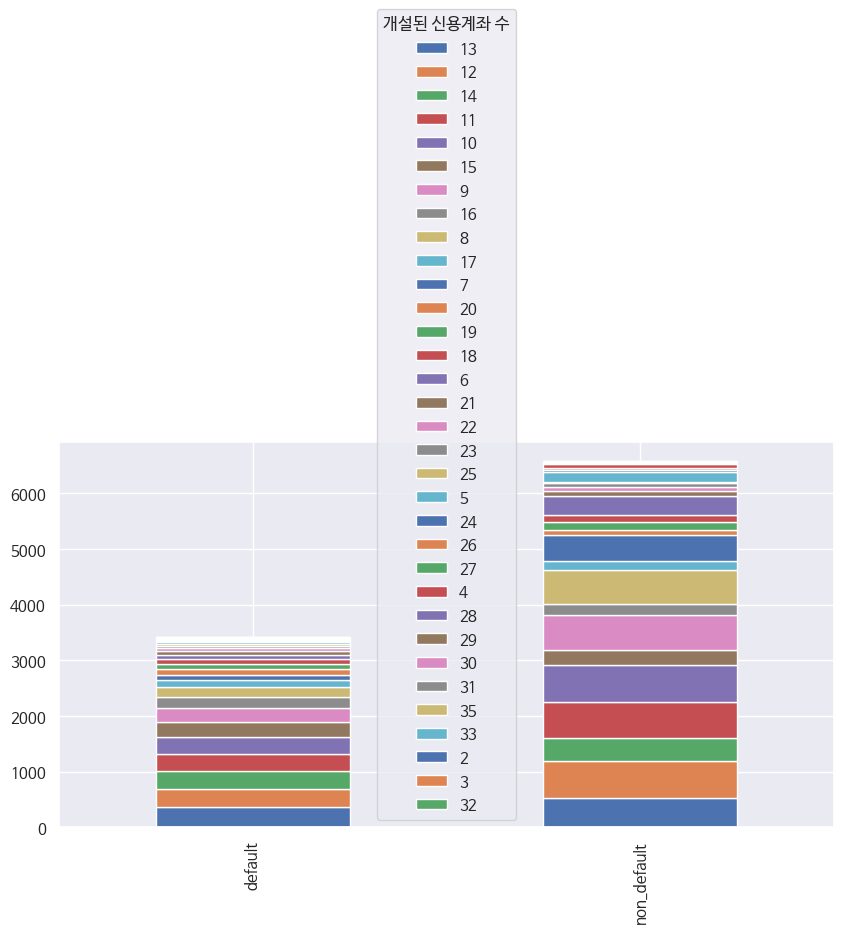

In [99]:
bar_chart('개설된 신용계좌 수')

In [100]:
train.groupby("채무 불이행 여부")['개설된 신용계좌 수'].value_counts(normalize = True).unstack() * 100

개설된 신용계좌 수,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,35
채무 불이행 여부,,,,,,,,,,,,,,,,,,,,,
0,0.030358,0.303582,1.123254,2.656345,5.085003,7.088646,9.107468,9.562842,10.230723,9.699454,...,0.425015,0.440194,0.166970,0.151791,0.151791,0.045537,0.091075,0.060716,0.015179,NaN
1,0.029308,0.029308,0.263775,0.849941,2.403283,2.989449,5.627198,7.004689,8.763189,9.114889,...,0.937866,0.410317,0.381008,0.234467,0.175850,0.117233,0.029308,NaN,0.029308,0.029308


In [101]:
train['개설된 신용계좌 수'].value_counts().sort_index()

,count
개설된 신용계좌 수,
2,3
3,21
4,83
5,204
6,417
7,569
8,792
9,869
10,973


In [102]:
train['개설된 신용계좌 수'].describe()

,개설된 신용계좌 수
count,10000.000000
mean,12.248900
std,4.620572
min,2.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,35.000000


### ***1.2.8 신용 거래 연수***

In [103]:
train['신용 거래 연수'].describe()

,신용 거래 연수
count,10000.000000
mean,19.879360
std,7.206693
min,6.000000
25%,14.600000
50%,17.950000
75%,24.100000
max,51.700000


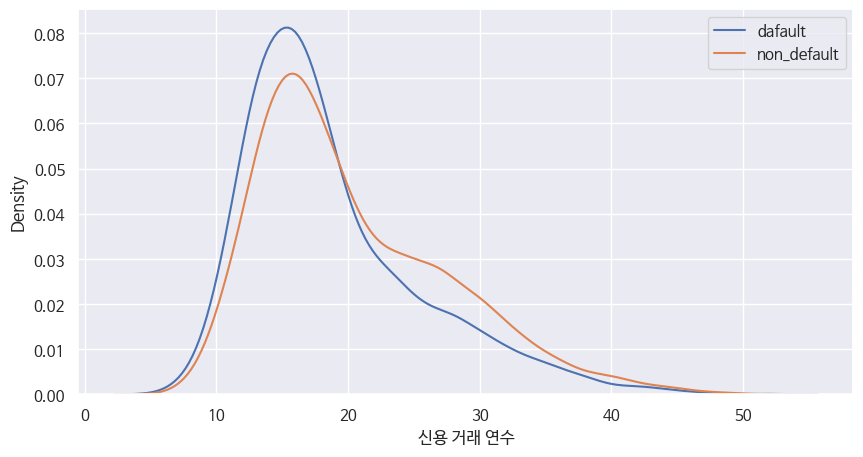

In [104]:
plt.figure(figsize = (10, 5))
sns.kdeplot(default['신용 거래 연수'],label = 'dafault')
sns.kdeplot(non_default['신용 거래 연수'], label = 'non_default')

plt.legend()
plt.show()

# 20보다 작은 경우 불이행 가능성 높음

### ***1.2.9 최대 신용한도***

In [105]:
train['최대 신용한도'].describe()

,최대 신용한도
count,1.000000e+04
mean,1.175265e+06
std,1.604199e+06
min,0.000000e+00
25%,4.482476e+05
50%,7.670910e+05
75%,1.147283e+06
max,2.323233e+07


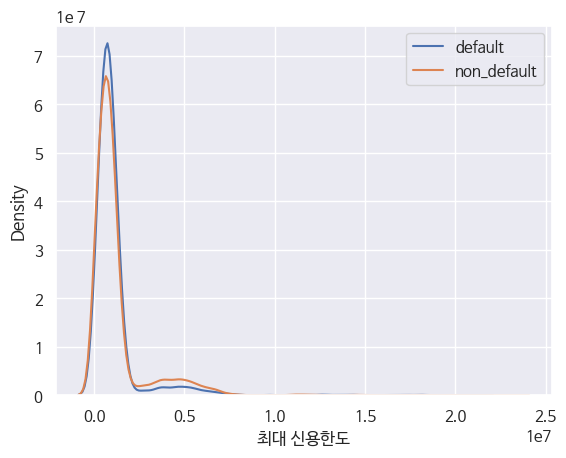

In [106]:
sns.kdeplot(default['최대 신용한도'], label = 'default')
sns.kdeplot(non_default['최대 신용한도'], label = 'non_default')

plt.legend()

# 0.09 ~ 0.23 경우 불이행 가능성 높음

### ***1.2.10 마지막 연체 이후 경과 개월 수***

In [107]:
train['마지막 연체 이후 경과 개월 수'].describe()

,마지막 연체 이후 경과 개월 수
count,10000.000000
mean,30.889200
std,20.011561
min,0.000000
25%,14.000000
50%,28.000000
75%,41.000000
max,88.000000


<Axes: xlabel='마지막 연체 이후 경과 개월 수', ylabel='Density'>

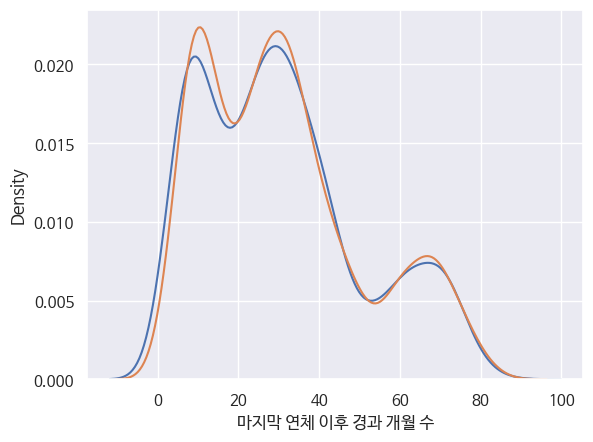

In [108]:
sns.kdeplot(default['마지막 연체 이후 경과 개월 수'], label = 'default')
sns.kdeplot(non_default['마지막 연체 이후 경과 개월 수'], label = 'non_default')

### ***1.2.11 개인 파산 횟***수

In [109]:
train['개인 파산 횟수'].describe()

,개인 파산 횟수
count,10000.000000
mean,0.373200
std,0.843797
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3.000000


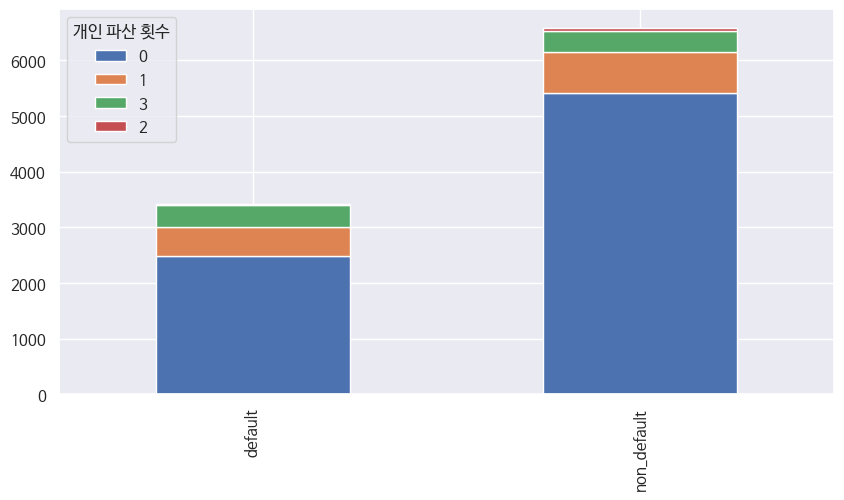

In [110]:
bar_chart('개인 파산 횟수')

In [111]:
train.groupby('채무 불이행 여부')['개인 파산 횟수'].value_counts(normalize = True).unstack() *100

개인 파산 횟수,0,1,2,3
채무 불이행 여부,,,,
0,82.027930,11.338798,0.956284,5.676988
1,72.743259,15.269637,0.322392,11.664713


### ***1.2.12 현재 대출 잔액***

In [112]:
train['현재 대출 잔액'].describe()

,현재 대출 잔액
count,1.000000e+04
mean,5.061200e+05
std,2.831462e+05
min,2.917650e+04
25%,3.001901e+05
50%,4.743412e+05
75%,5.919079e+05
max,1.373613e+06


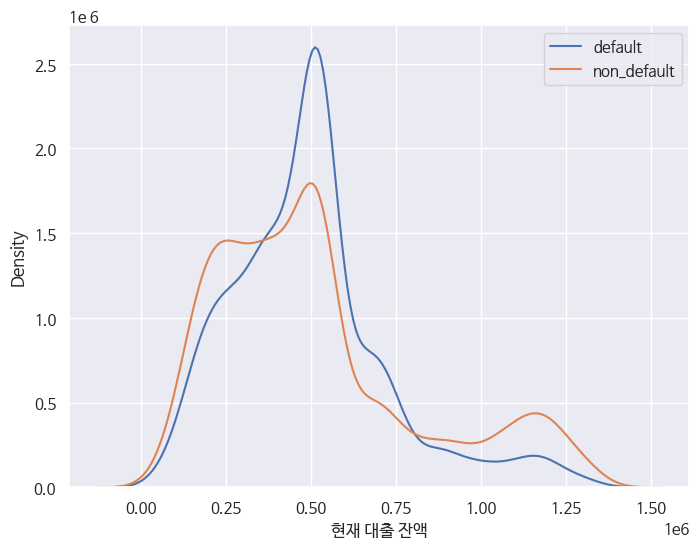

In [113]:
plt.figure(figsize=(8, 6))

sns.kdeplot(default['현재 대출 잔액'], label = 'default')
sns.kdeplot(non_default['현재 대출 잔액'], label = 'non_default')

plt.legend()

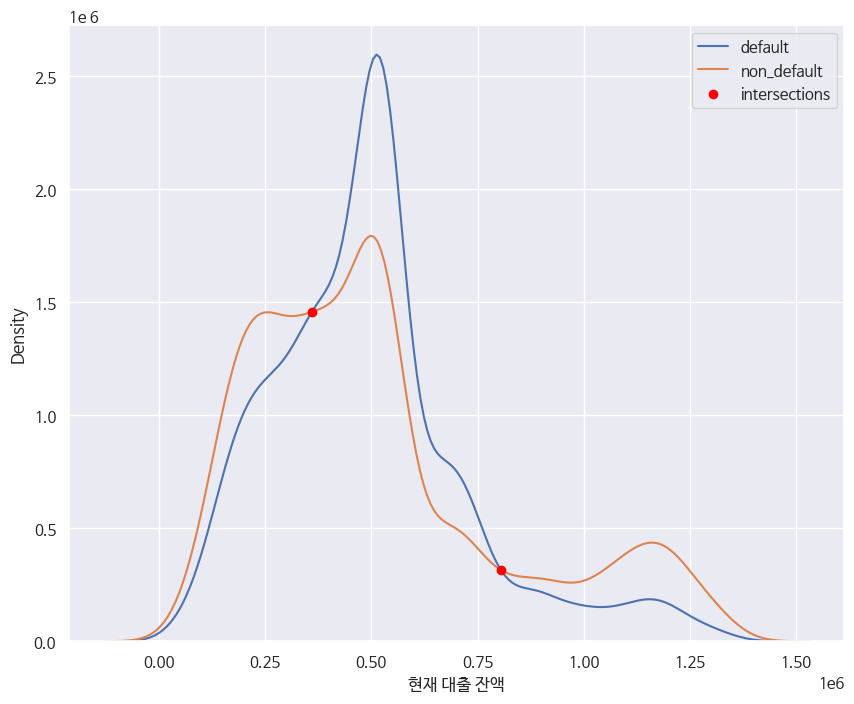

교차점 1 : x = 359558.39, y =  0.0000
교차점 2 : x = 805145.62, y =  0.0000


In [114]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy.optimize import fsolve

# KDE 객체 생성
kde_default = gaussian_kde(default['현재 대출 잔액'])
kde_non_default = gaussian_kde(non_default['현재 대출 잔액'])

# 두 함수의 차이를 0으로 만드는 x값 찾기
def find_intersection(x):
  return kde_default(x) - kde_non_default(x)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0 = [291760, 810000]) # fsolve는 방적식의 해를 찾는 함수로 find_section = 0이 되는 x 값을 찾아줌, 초기 추정값 x0=[291760, 810000]을 기준으로 해를 탐색, 교차점이 있을 것으로 에상되는 지점을 설정해야 함
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['현재 대출 잔액'], label = 'default')
sns.kdeplot(non_default['현재 대출 잔액'], label = 'non_default')

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x,y) in enumerate(zip(x_intersections, y_intersections)):
  print(f"교차점 {i+1} : x = {x :.2f}, y = {y : .4f}")

### ***1.2.13 현재 미상환 신용액***

In [115]:
train['현재 미상환 신용액'].describe()

,현재 미상환 신용액
count,1.000000e+04
mean,3.649126e+05
std,3.537942e+05
min,0.000000e+00
25%,1.471856e+05
50%,2.547930e+05
75%,4.749180e+05
max,3.946300e+06


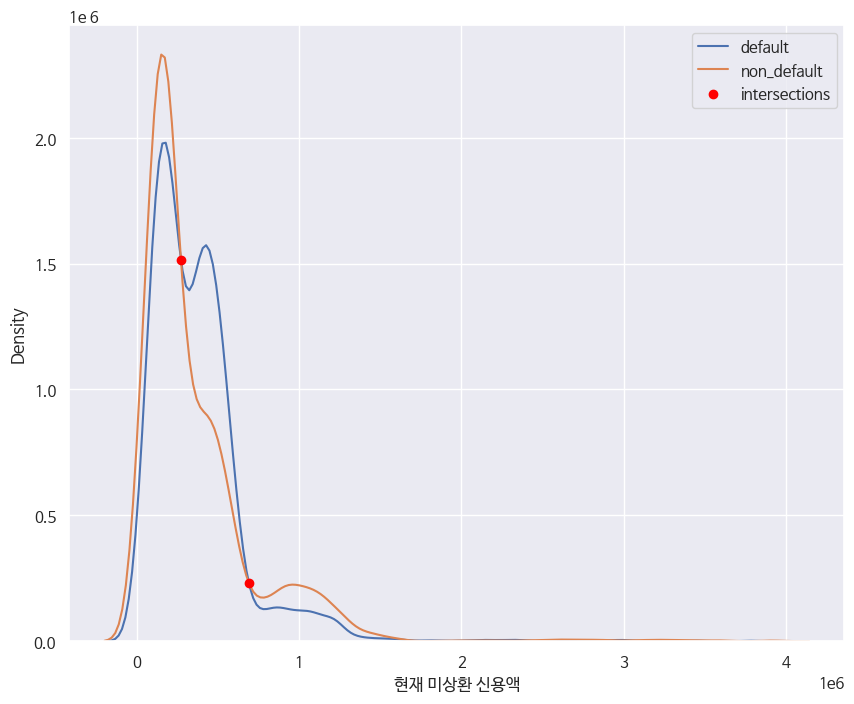

 교차점 1 : x =  273172.56, y =  0.0000
 교차점 2 : x =  691724.91, y =  0.0000


In [116]:
# kde 함수 생성
kde_default = gaussian_kde(default['현재 미상환 신용액'])
kde_nondefault = gaussian_kde(non_default['현재 미상환 신용액'])


# 두 함수의 차이를 0으로 만드는 x값 찾기
def find_intersection(x):
  return kde_default(x) - kde_nondefault(x)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0 =[290000, 500000])
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['현재 미상환 신용액'], label = 'default')
sns.kdeplot(non_default['현재 미상환 신용액'], label = 'non_default')

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 2, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x, y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f" 교차점 {i + 1} : x = {x : .2f}, y = {y : .4f}")


### ***1.2.14 월 상환 부채액***

In [117]:
train['월 상환 부채액'].describe()

,월 상환 부채액
count,10000.00000
mean,22367.28075
std,15186.49738
min,0.00000
25%,10893.75000
50%,20160.00000
75%,30647.25000
max,153574.50000


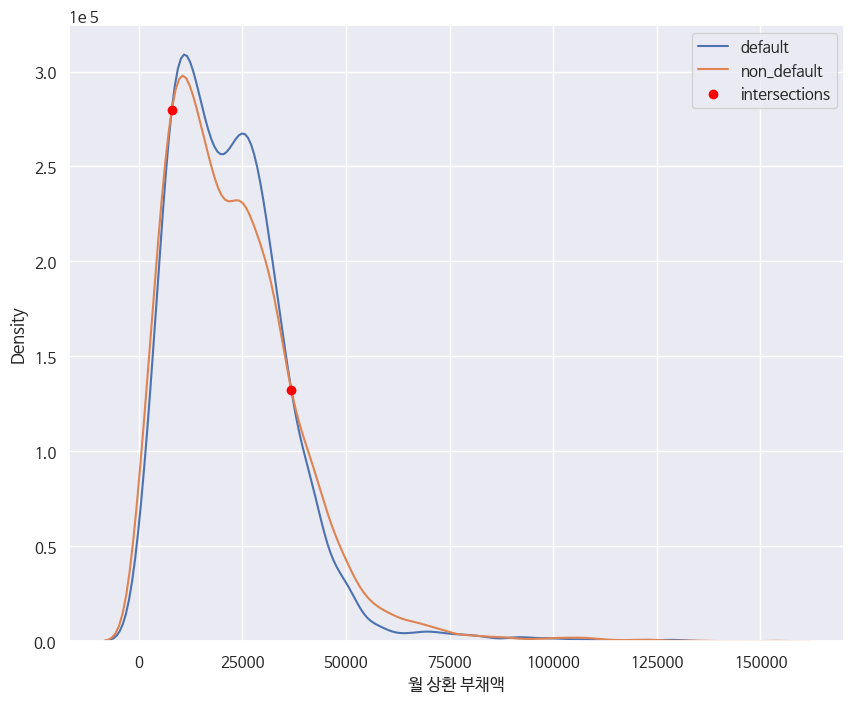

교차점 1 : x =  7988.18, y =  0.0000
교차점 2 : x =  36804.37, y =  0.0000


In [118]:
# kde 함수 생성
kde_default = gaussian_kde(default['월 상환 부채액'])
kde_nondefault = gaussian_kde(non_default['월 상환 부채액'])

# 두 함수의 차이가 0인 x값 찾기
def find_intersection(x) :
  return kde_default(x) - kde_nondefault(x)

# fsolve를 이용해 교차점 찾기
x_intersections = fsolve(find_intersection, x0 = [9000,30647])
y_intersections = kde_default(x_intersections)

plt.figure(figsize = (10, 8))
sns.kdeplot(default['월 상환 부채액'], label = 'default')
sns.kdeplot(non_default['월 상환 부채액'], label = 'non_default')

# 교차점 시각화
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x,y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f"교차점 {i + 1} : x = {x : .2f}, y = {y : .4f}")


### ***1.2.15 신용 점수***

In [119]:
train['신용 점수'].describe()

,신용 점수
count,10000.000000
mean,744.215000
std,56.995698
min,502.000000
25%,704.000000
50%,756.000000
75%,793.000000
max,825.000000


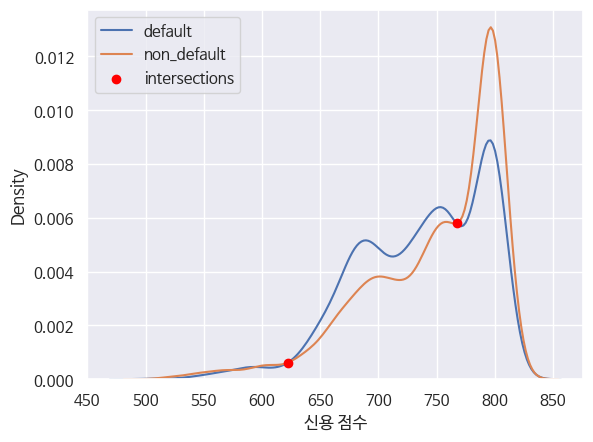

교차점 1 : x =  622.07, y =  0.00
교차점 2 : x =  767.19, y =  0.01


In [120]:
#kde 함수 생성
kde_default = gaussian_kde(default['신용 점수'])
kde_nondefault = gaussian_kde([non_default['신용 점수']])

# 교차점 찾는 함수 생성
def find_intersection(x) :
  return kde_default(x) - kde_nondefault(x)

# 교차점 찾기
x_intersections = fsolve(find_intersection, x0 = [620, 793])
y_intersections = kde_default(x_intersections)

sns.kdeplot(default['신용 점수'], label = 'default')
sns.kdeplot(non_default['신용 점수'], label = 'non_default')

# 교차점 그래프
plt.scatter(x_intersections, y_intersections, color = 'red', zorder = 3, label = 'intersections')

plt.legend()
plt.show()

# 교차점 출력
for i,(x, y) in enumerate(zip(x_intersections, y_intersections)) :
  print(f"교차점 { i + 1} : x = {x : .2f}, y = {y : .2f}")

# ***2. Feature Engineering***

## ***2.1 문자형 변수 범주형 변수로 변경***
주거형태, 현재 직장 근속 연수, 대출 목적, 대출 상환 기간

In [165]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  object 
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

### ***2.1.1 주거 형태(train, test)***

In [166]:
train['주거 형태'].unique()

array(['자가', '월세', '주택 담보 대출 (거주 중)', '주택 담보 대출 (비거주 중)'], dtype=object)

In [167]:
train['주거 형태'].value_counts()

,count
주거 형태,
월세,4050
주택 담보 대출 (거주 중),3633
자가,2241
주택 담보 대출 (비거주 중),76


In [168]:
train['주거 형태'] = train['주거 형태'].replace({'월세' : 0, '주택 담보 대출 (거주 중)' : 1,'자가' : 2, '주택 담보 대출 (비거주 중)' : 3})

In [169]:
test['주거 형태'] = test['주거 형태'].replace({'월세' : 0, '주택 담보 대출 (거주 중)' : 1,'자가' : 2, '주택 담보 대출 (비거주 중)' : 3})

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UID                10000 non-null  object 
 1   주거 형태              10000 non-null  int64  
 2   연간 소득              10000 non-null  float64
 3   현재 직장 근속 연수        10000 non-null  object 
 4   체납 세금 압류 횟수        10000 non-null  float64
 5   개설된 신용계좌 수         10000 non-null  int64  
 6   신용 거래 연수           10000 non-null  float64
 7   최대 신용한도            10000 non-null  float64
 8   신용 문제 발생 횟수        10000 non-null  int64  
 9   마지막 연체 이후 경과 개월 수  10000 non-null  int64  
 10  개인 파산 횟수           10000 non-null  int64  
 11  대출 목적              10000 non-null  object 
 12  대출 상환 기간           10000 non-null  object 
 13  현재 대출 잔액           10000 non-null  float64
 14  현재 미상환 신용액         10000 non-null  float64
 15  월 상환 부채액           10000 non-null  float64
 16  신용 점수              1000

### ***2.1.2 현재 직장 근속 연수(train, test)***

In [171]:
train['현재 직장 근속 연수'].unique()

array(['10년 이상', '4년', '6년', '2년', '8년', '3년', '5년', '9년', '7년', '1년 미만',
       '1년'], dtype=object)

In [172]:
import re

# 숫자 변환 함수
def convert_to_number(text) :
  if '미만' in text :
    return 0
  match = re.search(r'\d+', text) # re.search() : 문자열에서 숫자찾기, \d : 0~9 정규식, + : 하나 이상
  return int(match.group()) if match else None # match : 객체에서 실제로 일치한 텍스트이므로 숫자를 출력하기 위해서는 match.group() 해야 함!

train['현재 직장 근속 연수'] = train['현재 직장 근속 연수'].apply(convert_to_number) # 현재 직장 근속 연수 값을 convert_to_number 함수에 적용
train.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,2,1941337.5,10,0.0,9,13.4,400597.5,0,24,1,부채 통합,단기 상환,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,0,1979505.0,10,0.0,5,15.1,360679.5,0,11,0,부채 통합,단기 상환,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,0,1356381.0,4,0.0,12,18.8,491770.5,1,74,3,부채 통합,단기 상환,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,0,1049017.5,6,0.0,15,14.8,411546.0,1,22,1,부채 통합,단기 상환,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,0,4320217.5,2,0.0,11,26.1,895288.5,0,32,0,부채 통합,장기 상환,1163176.5,78991.5,5862.0,751,0


In [173]:
test['현재 직장 근속 연수'] = test['현재 직장 근속 연수'].apply(convert_to_number)
test['현재 직장 근속 연수'].value_counts()

,count
현재 직장 근속 연수,
10,753
2,188
3,165
0,145
5,144
4,140
1,136
7,121
6,100


In [174]:
train['현재 직장 근속 연수'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: 현재 직장 근속 연수
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.3 KB


In [175]:
train['현재 직장 근속 연수'] = train['현재 직장 근속 연수'].apply(lambda x : 0 if x == 0
                                                  else 1 if 1 <= x <= 3
                                                  else 2 if 4 <= x <=6
                                                        else 3 if 7 <= x <= 9
                                                              else 4
                                                  )
train['현재 직장 근속 연수'].head(10)

,현재 직장 근속 연수
0,4
1,4
2,2
3,2
4,1
5,4
6,3
7,1
8,1
9,1


In [176]:
train['현재 직장 근속 연수'].value_counts()

,count
현재 직장 근속 연수,
4,3828
1,2329
3,1728
2,1627
0,488


In [177]:
test['현재 직장 근속 연수'] = test['현재 직장 근속 연수'].apply(lambda x : 0 if x == 0
                                                else 1 if 1 <= x <= 3
                                                else 2 if 4 <= x <= 6
                                                else 3 if 7 <= x <= 9
                                                else 4)
test['현재 직장 근속 연수'].value_counts()

,count
현재 직장 근속 연수,
4,753
1,489
2,384
3,291
0,145


### ***2.1.3 대출 목적***

📌 불균형 데이터라고 해서 무조건 0, 1로 분류하는 것은 옳지 않음  
📌 각 범주의 성격이 동일한 것끼리 묶는 것이 좋음  
📌 일반적으로 소비성 대출 vs 생산성 대출로 구분  
* 부채통합 = 0
* 생산성 대출(사업 대출, 소규모 사업 자금) = 1
* 주거 관련 대출(주택 개보수, 주택 구매, 이사 비용) = 2
* 소비성 대출(여행 자금, 자동차 구매, 고액 구매, 결혼 자금, 휴가 비용) = 3
* 긴급성 대출(의료비, 교육비) = 4
* 기타 = 5

In [178]:
train['대출 목적'].unique()

array(['부채 통합', '자동차 구매', '기타', '사업 대출', '주택 개보수', '여행 자금', '소규모 사업 자금',
       '교육비', '의료비', '고액 구매', '결혼 자금', '휴가 비용', '주택 구매', '이사 비용'],
      dtype=object)

In [179]:
train['대출 목적'] = train['대출 목적'].apply(lambda x : 0 if x == '부채 통합'
                                      else 1 if x == '사업 대출' or x == '소규모 사업 자금'
                                      else 2 if x == '주택 개보수' or x == '주택 구매' or x == '이사 비용'
                                      else 3 if x == '여행 자금' or x == '자동차 구매' or x == '고액 구매' or x == '결혼 자금' or x == '휴가 비용'
                                      else 4 if x == '의료비' or x == '교육비'
                                      else 5)
train['대출 목적'].value_counts()

,count
대출 목적,
0,7294
5,970
2,939
3,356
1,280
4,161


In [180]:
test['대출 목적'] = test['대출 목적'].apply(lambda x : 0 if x == '부채 통합'
                                      else 1 if x == '사업 대출' or x == '소규모 사업 자금'
                                      else 2 if x == '주택 개보수' or x == '주택 구매' or x == '이사 비용'
                                      else 3 if x == '여행 자금' or x == '자동차 구매' or x == '고액 구매' or x == '결혼 자금' or x == '휴가 비용'
                                      else 4 if x == '의료비' or x == '교육비'
                                      else 5)
test['대출 목적'].value_counts()

,count
대출 목적,
0,1633
5,175
2,129
3,57
1,41
4,27


### ***2.1.4 대출 상환 기간***

In [181]:
train['대출 상환 기간'].unique()

array(['단기 상환', '장기 상환'], dtype=object)

In [182]:
train['대출 상환 기간'] = train['대출 상환 기간'].replace({'단기 상환' : 0, '장기 상환' : 1 })
test['대출 상환 기간'] = test['대출 상환 기간'].replace({'단기 상환' : 0, '장기 상환' : 1 })

In [183]:
train.head()

,UID,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,개설된 신용계좌 수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부
0,TRAIN_00000,2,1941337.5,4,0.0,9,13.4,400597.5,0,24,1,0,0,390903.0,225457.5,8806.5,767,0
1,TRAIN_00001,0,1979505.0,4,0.0,5,15.1,360679.5,0,11,0,0,0,1002184.5,64749.0,24961.5,767,0
2,TRAIN_00002,0,1356381.0,2,0.0,12,18.8,491770.5,1,74,3,0,0,227775.0,487644.0,12069.0,800,1
3,TRAIN_00003,0,1049017.5,2,0.0,15,14.8,411546.0,1,22,1,0,0,251383.5,413211.0,31749.0,796,1
4,TRAIN_00004,0,4320217.5,1,0.0,11,26.1,895288.5,0,32,0,0,1,1163176.5,78991.5,5862.0,751,0


## ***2.2 수치형 변수 범주화***

🚀 최종 결론: 어떻게 구간을 설정하는 게 좋을까?  
📌 "전체 데이터 분포를 먼저 보고 → 종속변수별 분포를 확인하여 최종 구간을 조정"하는 것이 가장 좋은 방법!

✔ 1️⃣ 전체 데이터를 보고 대략적인 구간을 설정  
✔ 2️⃣ 종속변수(채무 불이행 여부)별 분포를 분석하여 중요한 지점이 있는지 확인  
✔ 3️⃣ 특정 구간에서 불이행률 차이가 크다면 → 해당 지점을 기준으로 구간을 나눔  
✔ 4️⃣ 불필요한 세부 구간은 합쳐서 단순화

### ***2.2.1 개설된 신용계좌 수***
* 평균, 중앙값이 12 ->12를 중간 범주로 잡기 위해서 아래와 같이 범주 나눔
* 21개 이상부터는 데이터 개수가 작아져서 21이상, 30이상으로 범주 나눔
* 2 ~ 5 / 6 ~ 10 / 11 ~ 15 / 16 ~ 20 / 21 ~ 29 / 30 ~ 35

In [ ]:
train['개설된 신용계좌 수'].value_counts().sort_index()

,count
개설된 신용계좌 수,
2,3
3,21
4,83
5,204
6,417
7,569
8,792
9,869
10,973


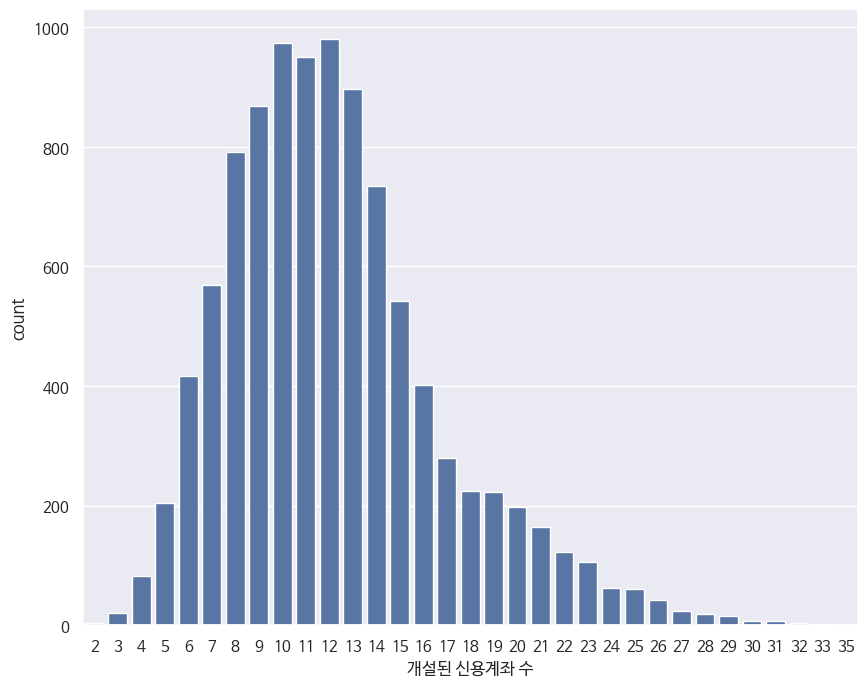

In [184]:
count = train['개설된 신용계좌 수'].value_counts().reset_index()
count.columns = ['개설된 신용계좌 수','count']

plt.figure(figsize = (10, 8))
sns.barplot(x = '개설된 신용계좌 수',y = 'count', data = count)
plt.xlabel('개설된 신용계좌 수')
plt.ylabel('count')
plt.show()

In [ ]:
train['개설된 신용계좌 수'].describe()

,개설된 신용계좌 수
count,10000.000000
mean,12.248900
std,4.620572
min,2.000000
25%,9.000000
50%,12.000000
75%,15.000000
max,35.000000


In [163]:
train['개설된 신용계좌 수'] = train['개설된 신용계좌 수'].apply(lambda x : 0 if 2 <= x <= 5
                                                else 1 if 6 <= x <= 10
                                                else 2 if 11 <= x <= 15
                                                else 3 if 16 <= x <= 20
                                                else 4 if 21 <= x <= 29
                                                else 5)
train['개설된 신용계좌 수'].value_counts()

,count
개설된 신용계좌 수,
2,4105
1,3620
3,1326
4,617
0,311
5,21


In [141]:
train['개설된 신용계좌 수'].value_counts().sort_index()

,count
개설된 신용계좌 수,
0,311
1,3620
2,4105
3,1326
4,617
5,21


In [140]:
test['개설된 신용계좌 수'] = test['개설된 신용계좌 수'].apply(lambda x : 0 if 2 <= x <= 5
                                                else 1 if 6 <= x <= 10
                                                else 2 if 11 <= x <= 15
                                                else 3 if 16 <= x <= 20
                                                else 4 if 21 <= x <= 29
                                                else 5)
test['개설된 신용계좌 수'].value_counts()

,count
개설된 신용계좌 수,
1,838
2,735
3,259
0,137
4,85
5,8


## ***2.3 연속형 변수 이상치 확인***
* 연간 소득
* 최대 신용한도
* 현재 대출 잔액
* 현재 미상환 신용액
* 월 상환 부채액
* 신용 점수
* 신용 거래 연수

### ***2.1.1 연간 소득 이상치***
📌 이상치 비율 9.08%미만으로 로그 변환 불필요

In [ ]:
q1 = train['연간 소득'].quantile(0.25)
q3 = train['연간 소득'].quantile(0.75)
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outiler = train[(train['연간 소득'] < lower_bound) | (train['연간 소득'] > upper_bound)]
print("연간 소득 이상치 개수 :", len(outiler))
print('연간 소득 이상치 비율 :', (len(outiler) / len(train['연간 소득'])) * 100 )

연간 소득 이상치 개수 : 908
연간 소득 이상치 비율 : 9.08


### ***2.1.2 최대 신용한도***
📌 이상치 비율 10.45%로 로그 변환 필요성 있음

In [ ]:
q1 = train['최대 신용한도'].quantile(0.25)
q3 = train['최대 신용한도'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

최대신용한도_outlier = train[(train['최대 신용한도'] < lower_bound) | (train['최대 신용한도'] > upper_bound)]
print('최대 신용한도 이상치 개수', len(최대신용한도_outlier))
print('최대 신용한도 이상치 비율', (len(최대신용한도_outlier)/len(train['최대 신용한도'])) * 100)

최대 신용한도 이상치 개수 1045
최대 신용한도 이상치 비율 10.45


### ***2.1.3 현재 대출 잔액***
📌 이상치 비율 8.77%만으로 로그 변환 불필요

In [ ]:
q1 = train['현재 대출 잔액'].quantile(0.25)
q3 = train['현재 대출 잔액'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

현재대출잔액_outlier = train[(train['현재 대출 잔액'] < lower_bound) | (train['현재 대출 잔액'] > upper_bound)]
print('현재 대출 잔액 이상치 개수', len(현재대출잔액_outlier))
print('현재 대출 잔액 이상치 비율', (len(현재대출잔액_outlier)/len(train['현재 대출 잔액'])) * 100)

현재 대출 잔액 이상치 개수 877
현재 대출 잔액 이상치 비율 8.77


### ***2.1.4 현재 미상환 신용액***
📌 이상치 비율 6.6%으로 로그 변환 불필요

In [ ]:
q1 = train['현재 미상환 신용액'].quantile(0.25)
q3 = train['현재 미상환 신용액'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

현재미상환신용액_outlier = train[(train['현재 미상환 신용액'] < lower_bound) | (train['현재 미상환 신용액'] > upper_bound)]
print('현재 미상환 신용액 이상치 개수', len(현재미상환신용액_outlier))
print('현재 미상환 신용액 이상치 비율', (len(현재미상환신용액_outlier)/len(train['현재 미상환 신용액'])) * 100)

현재 미상환 신용액 이상치 개수 660
현재 미상환 신용액 이상치 비율 6.6000000000000005


### ***2.1.5 월 상환 부채액***
📌 이상치 비율 1.99%으로 로그 변환 불필요

In [ ]:
q1 = train['월 상환 부채액'].quantile(0.25)
q3 = train['월 상환 부채액'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

월상환부채액_outlier = train[(train['월 상환 부채액'] < lower_bound) | (train['월 상환 부채액'] > upper_bound)]
print('월 상환 부채액 이상치 개수', len(월상환부채액_outlier))
print('월 상환 부채액 이상치 비율', (len(월상환부채액_outlier)/len(train['월 상환 부채액'])) * 100)

월 상환 부채액 이상치 개수 199
월 상환 부채액 이상치 비율 1.9900000000000002


### ***2.1.6 신용 점수***
📌 이상치 비율 1.08%으로 로그 변환 불필요

In [ ]:
q1 = train['신용 점수'].quantile(0.25)
q3 = train['신용 점수'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

신용점수_outlier = train[(train['신용 점수'] < lower_bound) | (train['신용 점수'] > upper_bound)]
print('신용 점수 이상치 개수', len(신용점수_outlier))
print('신용 점수 이상치 비율', (len(신용점수_outlier)/len(train['신용 점수'])) * 100)

신용 점수 이상치 개수 108
신용 점수 이상치 비율 1.08


### ***2.1.7 신용 거래 연수***
📌 이상치 비율 1.94%으로 로그 변환 불필요

In [ ]:
q1 = train['신용 거래 연수'].quantile(0.25)
q3 = train['신용 거래 연수'].quantile(0.75)

IQR = q3 -q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

신용거래연수_outlier = train[(train['신용 거래 연수'] < lower_bound) | (train['신용 거래 연수'] > upper_bound)]
print("신용 거래 연수 이상치 개수 :", len(신용거래연수_outlier))
print("신용 거래 연수 이상치 비율 :", (len(신용거래연수_outlier) / len(train['신용 거래 연수'])) * 100)

신용 거래 연수 이상치 개수 : 194
신용 거래 연수 이상치 비율 : 1.94


## ***2.4 변수 제거***

📌 UID는 예측에 불필요한 변수이므로 제거(train에서만 제거, test는 제출할 때 따로 저장 후 제거)

In [ ]:
train = train.drop('UID', axis = 1)

In [ ]:
train.columns

Index(['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '신용계좌수_그룹'],
      dtype='object')

### ***2.3.1 상관계수 확인***

📌 상관관계 확인   
📌 상관계수 절대값 0.8 이상은 다중 공선성 문제 확인할 필요 있음  
📌 해당 데이터에는 존재하지 않음

In [ ]:
train.corr()

,주거 형태,연간 소득,현재 직장 근속 연수,체납 세금 압류 횟수,신용 거래 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,신용계좌수_그룹
주거 형태,1.000000,0.087759,0.000077,0.000042,0.120683,0.073629,-0.037750,-0.116934,-0.044068,0.136576,-0.160809,0.116814,0.001423,0.049927,-0.123679,-0.062514,0.027898
연간 소득,0.087759,1.000000,0.096829,0.090106,0.308904,0.377923,0.055681,-0.065386,-0.017336,0.074023,-0.109321,0.403319,0.336916,0.416631,0.045491,-0.120499,0.082269
현재 직장 근속 연수,0.000077,0.096829,1.000000,-0.002129,0.110810,0.055164,0.025862,0.002687,0.016512,0.006386,0.092884,0.043669,0.048816,0.097235,0.116151,-0.043089,0.036957
체납 세금 압류 횟수,0.000042,0.090106,-0.002129,1.000000,0.090488,-0.031614,0.510265,0.132386,0.225035,0.151167,0.024957,0.109320,-0.069903,0.022609,-0.007147,-0.030419,-0.031184
신용 거래 연수,0.120683,0.308904,0.110810,0.090488,1.000000,0.275284,0.128106,-0.048344,0.133616,0.099616,0.004799,0.233531,0.186893,0.232618,0.116424,-0.108856,0.060029
최대 신용한도,0.073629,0.377923,0.055164,-0.031614,0.275284,1.000000,-0.092891,-0.119547,-0.116278,0.011430,-0.110728,0.361259,0.392104,0.379351,0.049756,-0.044997,0.099798
신용 문제 발생 횟수,-0.037750,0.055681,0.025862,0.510265,0.128106,-0.092891,1.000000,0.227206,0.600116,0.074505,0.110826,0.017065,-0.093040,-0.024605,0.065530,0.044847,-0.083053
마지막 연체 이후 경과 개월 수,-0.116934,-0.065386,0.002687,0.132386,-0.048344,-0.119547,0.227206,1.000000,0.243908,0.000347,0.173601,-0.144126,-0.100230,-0.117031,0.112091,-0.012058,-0.043745
개인 파산 횟수,-0.044068,-0.017336,0.016512,0.225035,0.133616,-0.116278,0.600116,0.243908,1.000000,-0.053855,0.128475,-0.085709,-0.082009,-0.065000,0.093226,0.115900,-0.091497
대출 목적,0.136576,0.074023,0.006386,0.151167,0.099616,0.011430,0.074505,0.000347,-0.053855,1.000000,-0.016384,0.050911,-0.143592,-0.049215,-0.073849,-0.198585,0.025507


### ***2.3.2 중요 변수 확인(랜덤포레스트)***
📌 어떤 변수를 제거해야 할지 감이 안 잡혀서 랜덤포레스트로 변수 중요도 확인  
📌 일반적으로 0.01 이하이면 의미가 낮아 제거 가능

In [ ]:
# 독립변수, 종속변수 분할

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '신용계좌수_그룹']
X = train[feature]
y = train['채무 불이행 여부']


from sklearn.model_selection import train_test_split

# train, val 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier

# 모델 불러오기
model = RandomForestClassifier()

# 모델 학습
model.fit(X_train, y_train)

# 변수 중요도 추출
importances = model.feature_importances_

# 데이터 프레임으로 정렬
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature' : X_train.columns, 'Importance' : importances})

# 중요도 순으로 정렬
feature_importance_df = feature_importance_df.sort_values(by = 'Importance', ascending = False)

# 출력
feature_importance_df


,Feature,Importance
1,연간 소득,0.112534
12,현재 미상환 신용액,0.105708
11,현재 대출 잔액,0.105646
14,신용 점수,0.093991
4,신용 거래 연수,0.093660
5,최대 신용한도,0.093032
13,월 상환 부채액,0.091000
7,마지막 연체 이후 경과 개월 수,0.085752
15,신용계좌수_그룹,0.049488
2,현재 직장 근속 연수,0.044275


### ***2.3.3 중요 변수 확인(Permutation Importance:순열 중요도)***
📌 0.001 이하는 영향이 거의 없는 변수로 변수 제거 후보  
📌 0.001 이하 변수 : 주거 형태, 체납 세급 압류 횟수, 월 상환 부채액

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_val, y_val, n_repeats = 10, random_state = 42)

perm_importance_df = pd.DataFrame({'Feature' : X_val.columns,
                                   'Importance' : result.importances_mean}).sort_values(by = 'Importance', ascending = False)
perm_importance_df

,Feature,Importance
1,연간 소득,0.02855
9,대출 목적,0.01450
12,현재 미상환 신용액,0.01190
8,개인 파산 횟수,0.01015
15,신용계좌수_그룹,0.00915
14,신용 점수,0.00885
6,신용 문제 발생 횟수,0.00495
10,대출 상환 기간,0.00440
2,현재 직장 근속 연수,0.00265
11,현재 대출 잔액,0.00245


### ***2.2.4 중요 변수 확인(VIF:다중공선성확인,중복된 정보 제거)***
📌 10이상은 다중공선성 매우 높으므로 제거 필요 있음  
📌 5 ~ 10 다른 변수와 상관관계 높으므로 주의 필요  
📌 10이상 변수 : 신용 거래 연수, 신용 점수  
📌 5 ~ 10 변수 : 개설된 신용계좌 수, 현재 대출 잔액

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

vif_data = pd.DataFrame()
vif_data['Feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)

              Feature        VIF
0               주거 형태   2.223023
1               연간 소득   4.858645
2         현재 직장 근속 연수   4.508687
3         체납 세금 압류 횟수   1.511220
4            신용 거래 연수  10.761100
5             최대 신용한도   2.186885
6         신용 문제 발생 횟수   2.600933
7   마지막 연체 이후 경과 개월 수   3.750980
8            개인 파산 횟수   2.015884
9               대출 목적   1.510017
10           대출 상환 기간   4.485094
11           현재 대출 잔액   6.269506
12         현재 미상환 신용액   2.835868
13           월 상환 부채액   4.546329
14              신용 점수  24.076448
15           신용계좌수_그룹   3.870831


### 2.2.5 중요도, VIF 비교
📌 체납 세금 압류 횟수, 주거 형태 제거  
📌 최대 신용한도, 월 상환 부채액, 신용 거래 연수, 신용점수 검토 필요 -> 랜덤 포레스트로 해당 변수 여부로 성능 비교  
📌 신용 거래 연수, 신용점수 검토 필요 -> 두 변수 상관계수 확인

#### ***2.2.5.1 최대 신용한도***
📌 0.6995 정확도에서 변수 삭제 후 0.687로 감소 -> 해당 변수 유지

In [ ]:
train.columns

Index(['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '채무 불이행 여부', '신용계좌수_그룹'],
      dtype='object')

In [ ]:
# 월 상환 부채액 변수 포함 모델

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train['채무 불이행 여부']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.6995

In [ ]:
# 최대 신용한도 변수 제거 모델

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train['채무 불이행 여부']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.687

#### ***2.2.5.2 월 상환 부채액***
📌 0.6995 정확도에서 변수 삭제 후 0.695로 감소 -> 해당 변수 유지

In [ ]:
# 월 상환 부채액 변수 제거 모델

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train['채무 불이행 여부']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.695

#### ***2.2.5.3 신용 거래 연수***
📌 0.6995 정확도에서 변수 삭제 후 0.702로 증가 -> 해당 변수 제거

In [ ]:
# 신용 거래 연수 변수 제거 모델

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train['채무 불이행 여부']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

#정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.702

#### ***2.2.5.4 신용 점수***
📌 0.6995 정확도에서 변수 삭제 후 0.689로 감소 -> 해당 변수 유지

In [ ]:
# 신용 점수 변수 제거 모델

feature = ['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '신용 거래 연수', '최대 신용한도',
       '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수', '대출 목적', '대출 상환 기간',
       '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용계좌수_그룹']

X = train[feature]
y = train['채무 불이행 여부']

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_val)

#정확도 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred)
accuracy

0.689

In [ ]:
train = train.drop(['신용 거래 연수', '체납 세금 압류 횟수', '주거 형태'], axis = 1)

In [ ]:
test = test.drop(['신용 거래 연수', '체납 세금 압류 횟수', '주거 형태'], axis = 1)

In [ ]:
train.shape

(10000, 14)

In [ ]:
test.shape

(2062, 14)

In [ ]:
train.head()

,연간 소득,현재 직장 근속 연수,최대 신용한도,신용 문제 발생 횟수,마지막 연체 이후 경과 개월 수,개인 파산 횟수,대출 목적,대출 상환 기간,현재 대출 잔액,현재 미상환 신용액,월 상환 부채액,신용 점수,채무 불이행 여부,신용계좌수_그룹
0,1941337.5,10,400597.5,0,24,1,0,1,390903.0,225457.5,8806.5,767,0,2
1,1979505.0,10,360679.5,0,11,0,0,1,1002184.5,64749.0,24961.5,767,0,3
2,1356381.0,4,491770.5,1,74,3,0,1,227775.0,487644.0,12069.0,800,1,1
3,1049017.5,6,411546.0,1,22,1,0,1,251383.5,413211.0,31749.0,796,1,0
4,4320217.5,2,895288.5,0,32,0,0,0,1163176.5,78991.5,5862.0,751,0,2


# ***3. Modeling***

## ***3.1 로지스틱 회귀 분석(정확도 : 0.6665)***

In [ ]:
train.columns

Index(['연간 소득', '현재 직장 근속 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수', '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액',
       '신용 점수', '채무 불이행 여부', '신용계좌수_그룹'],
      dtype='object')

In [ ]:
# 독립변수, 종속변수 분할
feature = ['연간 소득', '현재 직장 근속 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수', '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액',
       '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train["채무 불이행 여부"]

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 모델 불러오기
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()

# 모델 학습
lg.fit(X_train, y_train)

# 모델 예측
y_pred = lg.predict(X_val)

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
print(f"로지스틱 회귀분석 정확도 : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)


로지스틱 회귀분석 정확도 :  0.6665
[[1143  127]
 [ 540  190]]
              precision    recall  f1-score   support

           0       0.68      0.90      0.77      1270
           1       0.60      0.26      0.36       730

    accuracy                           0.67      2000
   macro avg       0.64      0.58      0.57      2000
weighted avg       0.65      0.67      0.62      2000



## ***3.2 랜덤포레스트(정확도 : 0.6975)***

In [ ]:
# 독립변수, 종속변수 분할
feature = ['연간 소득', '현재 직장 근속 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수',
       '개인 파산 횟수', '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액',
       '신용 점수', '신용계좌수_그룹']

X = train[feature]
y = train["채무 불이행 여부"]

# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)


# 모델 불러오기
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# 모델 학습
random_forest.fit(X_train, y_train)

# 모델 예측
y_pred = random_forest.predict(X_val)

# 정확도 평가
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_val, y_pred)
print(f"랜덤포레스트 정확도 : {accuracy : .4f}")

cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)
print(cm)
print(cr)


랜덤포레스트 정확도 :  0.6975
[[1142  128]
 [ 477  253]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79      1270
           1       0.66      0.35      0.46       730

    accuracy                           0.70      2000
   macro avg       0.68      0.62      0.62      2000
weighted avg       0.69      0.70      0.67      2000



In [ ]:
importances = random_forest.feature_importances_

# 데이터 프레임으로 정렬
import pandas as pd
random_forest_df = pd.DataFrame({'Feature' : X.columns, 'Importance' : importances})

# 중요도 순으로 정렬
random_forest_df = random_forest_df.sort_values(by = 'Importance', ascending = False)
random_forest_df

,Feature,Importance
0,연간 소득,0.131601
9,현재 미상환 신용액,0.121019
8,현재 대출 잔액,0.120924
2,최대 신용한도,0.108429
10,월 상환 부채액,0.107547
11,신용 점수,0.106693
4,마지막 연체 이후 경과 개월 수,0.097789
12,신용계좌수_그룹,0.054160
1,현재 직장 근속 연수,0.051456
6,대출 목적,0.031495
